In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from PIL import Image

In [3]:
from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

In [4]:
import tensorflow as tf

In [5]:
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose

Using TensorFlow backend.


In [6]:
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [7]:
p=os.getcwd()

In [8]:
print(p)

/home/ipsa


In [9]:
im_width = 128
im_height = 128
border = 5

In [10]:
path_train = '/home/ipsa/Downloads/TMAP/train/'
path_test = '/home/ipsa/Downloads/TMAP/test/'

In [11]:
u = np.zeros((1, im_height, im_width, 3), dtype=np.float32)

In [12]:
img = load_img(path_train + '/images/r18.jpg', grayscale=False, color_mode='rgb')
x_img = img_to_array(img)
x_img = resize(x_img, (128, 128, 3), mode='constant', preserve_range=True)
u.append(x_img/255)

/home/ipsa/m1/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


AttributeError: 'numpy.ndarray' object has no attribute 'append'

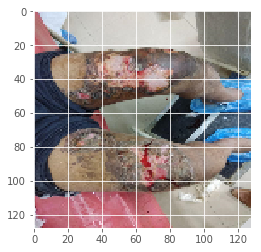

In [20]:
plt.imshow(x_img/255)

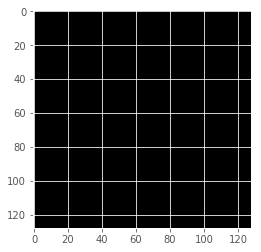

In [21]:
plt.imshow(np.asarray(u[0]))

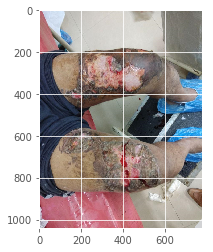

In [22]:
plt.imshow(np.asarray(img))

In [50]:
def get_data(path, train=True):
    ids = next(os.walk(path + "images"))[2]
    print(ids)
    X = np.zeros((len(ids), im_height, im_width, 3), dtype=np.float32)
    print('**',X.shape)
    if train:
        y = np.zeros((len(ids), im_height, im_width, 3), dtype=np.float32)
        print('**',y.shape)
    print('Getting and resizing images ... ')
    for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):
        # Load images
        img = load_img(path + '/images/' + id_, grayscale=False, color_mode='rgb')
        plt.imshow(np.asarray(img))
        x_img = img_to_array(img)
        print(x_img.shape)
        #plt.imshow(x_img/255.)
        x_img = resize(x_img, (128, 128, 3), mode='constant', preserve_range=True)
        print(x_img.shape)
        plt.imshow(x_img)
        # Load masks
        if train:
            mask = img_to_array(load_img(path + '/masks/' + id_, grayscale=False))
            mask = resize(mask, (128, 128, 3), mode='constant', preserve_range=True)

        # Save images
        
        X[n] = x_img / 255.
        if train:
            y[n] = mask / 255
    print('Done!')
    if train:
        return X, y
    else:
        return X

['r4.jpg', 'r26.jpg', 'r7.jpg', 'r27.jpg', 'r17.jpg', 'r23.jpg', 'r8.jpg', 'r10.jpg', 'r25.jpg', 'r14.jpg', 'r19.jpg', 'r9.jpg', 'r6.jpg', 'r33.jpg', 'r22.jpg', 'r12.jpg', 'r2.jpg', 'r30.jpg', 'r18.jpg', 'r5.jpg', 'r31.jpg', 'r11.jpg', 'r16.jpg', 'r21.jpg', 'r20.jpg', 'r34.jpg', 'r29.jpg', 'r1.jpg', 'r3.jpg', 'r32.jpg', 'r15.jpg', 'r28.jpg', 'r24.jpg']
** (33, 128, 128, 3)
** (33, 128, 128, 3)
Getting and resizing images ... 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(538, 1000, 3)
(128, 128, 3)
(1280, 720, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(838, 1838, 3)
(128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1959, 2577, 3)
(128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1040, 780, 3)
(128, 128, 3)
(1160, 870, 3)
(128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(972, 1463, 3)
(128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(782, 2646, 3)
(128, 128, 3)
(1040, 780, 3)
(128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(632, 648, 3)
(128, 128, 3)
(1152, 864, 3)
(128, 128, 3)
(1216, 964, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128, 3)
(800, 600, 3)
(128, 128, 3)
(960, 436, 3)
(128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1280, 960, 3)
(128, 128, 3)
(354, 968, 3)
(128, 128, 3)
(414, 634, 3)
(128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1280, 960, 3)
(128, 128, 3)
(1040, 780, 3)
(128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1040, 1006, 3)
(128, 128, 3)
(792, 306, 3)
(128, 128, 3)
(1086, 466, 3)
(128, 128, 3)
(688, 566, 3)
(128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(864, 1152, 3)
(128, 128, 3)
(774, 1032, 3)
(128, 128, 3)
(960, 1280, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128, 3)
(960, 1280, 3)
(128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1334, 1334, 3)
(128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2592, 1935, 3)
(128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(960, 442, 3)
(128, 128, 3)
(1280, 566, 3)
(128, 128, 3)
(1056, 1280, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128, 3)
(1280, 960, 3)
(128, 128, 3)

Done!


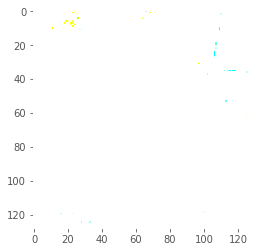

In [51]:
X, y = get_data(path_train, train=True)

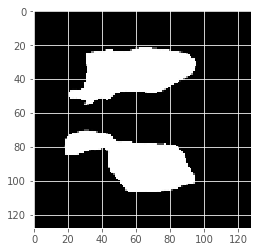

In [52]:
plt.imshow(y[18])

In [53]:
ty

NameError: name 'ty' is not defined

In [54]:
X[0].shape

(128, 128, 3)

In [55]:
type(X[0])

numpy.ndarray

In [29]:
img = Image.fromarray(X[1],mode='RGB')
img.save('my.jpg')
img.show()

In [56]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=2668)

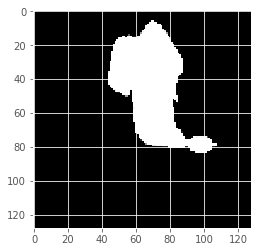

In [57]:
plt.imshow(y_train[0])

In [58]:
ix = random.randint(0, len(X_train))

In [59]:
has_mask = y_train[ix].max() > 0

In [60]:
print(y_train.shape)

(23, 128, 128, 3)


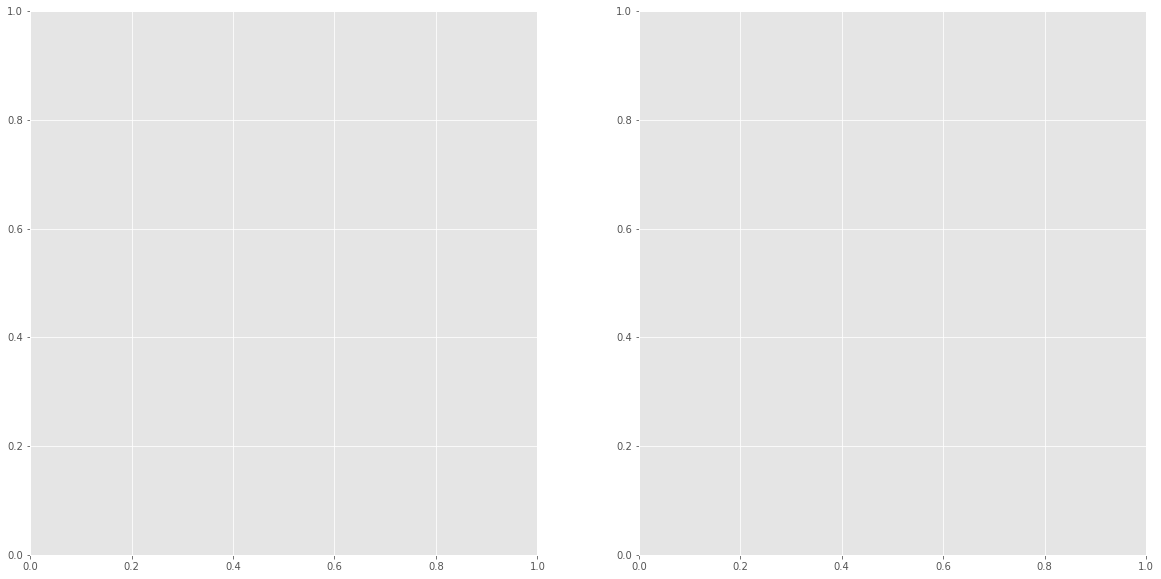

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

In [62]:
print(ax)

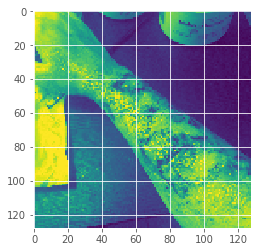

In [63]:
plt.imshow(X_train[ix, ..., 0])

In [64]:
print(ix)

17


In [65]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)

if has_mask:
    ax[0].contour(y_train[ix].squeeze(), Y, levels=[0.5])
ax[0].set_title('o')

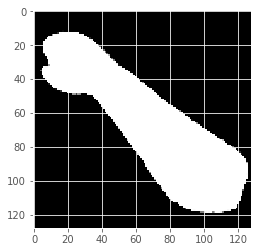

In [66]:
plt.imshow(y_train[ix].squeeze())

In [67]:
ax[1].imshow(y_train[ix].squeeze(), interpolation='bilinear', cmap='gray')
ax[1].set_title('burn');

In [68]:
def conv2d_block(input_tensor, n_filters, kernel_size=3, batchnorm=True):
    # first layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # second layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

In [69]:
def get_unet(input_img, n_filters=16, dropout=0.5, batchnorm=True):
    # contracting path
    c1 = conv2d_block(input_img, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    p1 = MaxPooling2D((2, 2)) (c1)
    p1 = Dropout(dropout*0.5)(p1)

    c2 = conv2d_block(p1, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
    p2 = MaxPooling2D((2, 2)) (c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)
    p3 = MaxPooling2D((2, 2)) (c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters=n_filters*16, kernel_size=3, batchnorm=batchnorm)
    
    # expansive path
    u6 = Conv2DTranspose(n_filters*8, (3, 3), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)

    u7 = Conv2DTranspose(n_filters*4, (3, 3), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)

    u8 = Conv2DTranspose(n_filters*2, (3, 3), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)

    u9 = Conv2DTranspose(n_filters*1, (3, 3), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    
    outputs = Conv2D(3, (1, 1), activation='sigmoid') (c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [70]:
input_img = Input((im_height, im_width, 3), name='img')
model = get_unet(input_img, n_filters=16, dropout=0.08, batchnorm=True)


In [71]:
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [72]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 128, 128, 16) 448         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_37 (BatchNo (None, 128, 128, 16) 64          conv2d_39[0][0]                  
__________________________________________________________________________________________________
activation_37 (Activation)      (None, 128, 128, 16) 0           batch_normalization_37[0][0]     
__________________________________________________________________________________________________
conv2d_40 

In [76]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.1, verbose=1),
    ModelCheckpoint('model-weights-stable.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [77]:
results = model.fit(X_train, y_train, batch_size=9, epochs=10, callbacks=callbacks,
                    validation_data=(X_valid, y_valid))

Train on 23 samples, validate on 10 samples
Epoch 1/10


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_39/convolution}} = Conv2D[T=DT_FLOAT, _class=["loc:@training_1/Adam/gradients/conv2d_39/convolution_grad/Conv2DBackpropFilter"], data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training_1/Adam/gradients/conv2d_39/convolution_grad/Conv2DBackpropFilter-0-TransposeNHWCToNCHW-LayoutOptimizer, conv2d_39/kernel/read)]]
	 [[{{node metrics_2/acc/Mean_1/_2297}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_7945_metrics_2/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

NameError: name 'results' is not defined

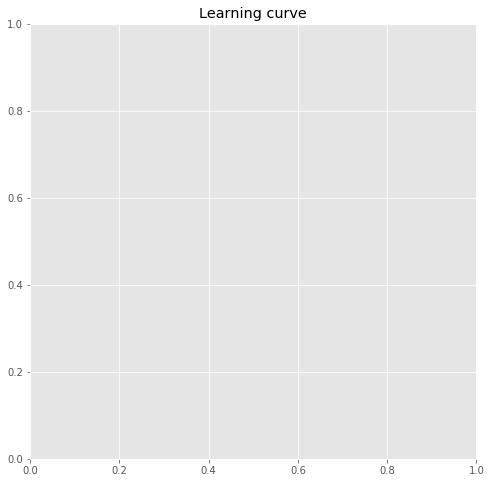

In [78]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [254]:
model.load_weights('model-weights-stable.h5')

In [255]:
model.evaluate(X_valid, y_valid, verbose=1)

10/10 [==============================] - 2s 175ms/step


[0.6695016622543335, 0.6296976804733276]

In [259]:
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_valid, verbose=1)

10/10 [==============================] - 0s 15ms/step


In [260]:
preds_train_t = (preds_train > 0.5).astype(np.uint8)

In [261]:
preds_val_t = (preds_val > 0.5).astype(np.uint8)

In [262]:
def plot_sample(X, y, preds, binary_preds, ix=None):
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='coolwarm')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('patient image')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('ground truth')

    ax[2].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('burn predicted binary');
    
    ax[3].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('burn predicted')
    
    

In [267]:
type(preds_train)

numpy.ndarray

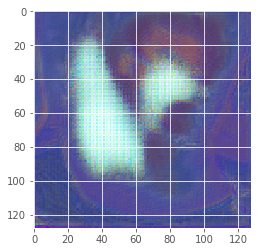

In [273]:
plt.imshow(preds_train[1])

In [295]:
v=9

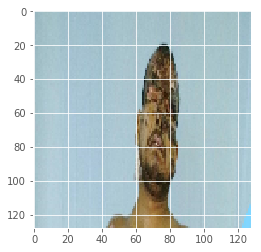

In [296]:
plt.imshow(X_valid[v])

In [1]:
plt.imshow(preds_train[v])

NameError: name 'plt' is not defined

TypeError: Input must be a 2D array.

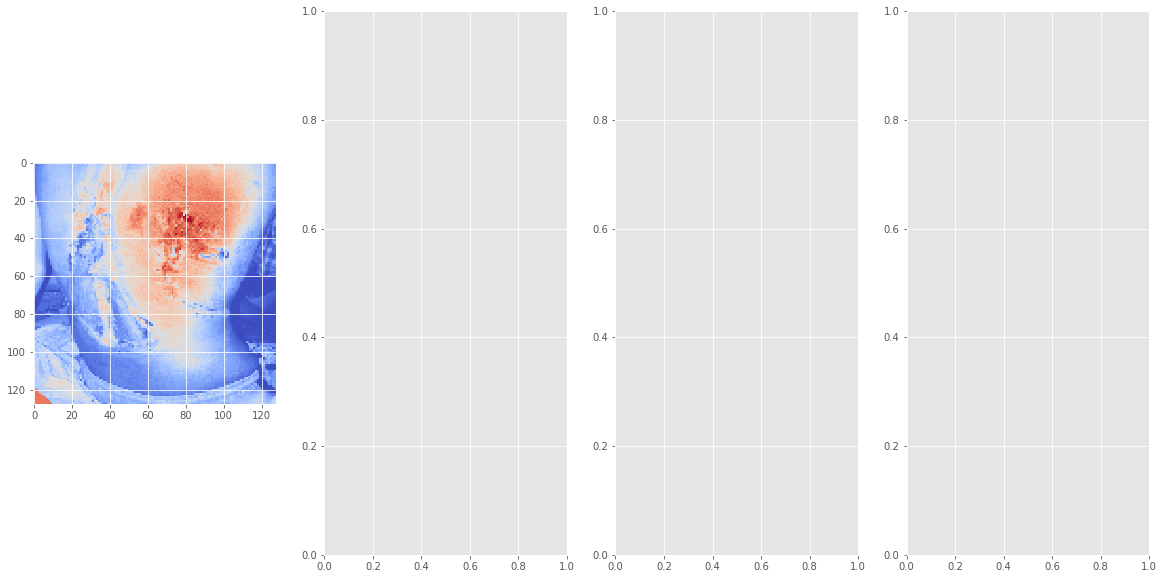

In [264]:
for uu in range(1,8):
    
    (X_train, y_train, preds_train, preds_train_t, ix=uu)

TypeError: Input must be a 2D array.

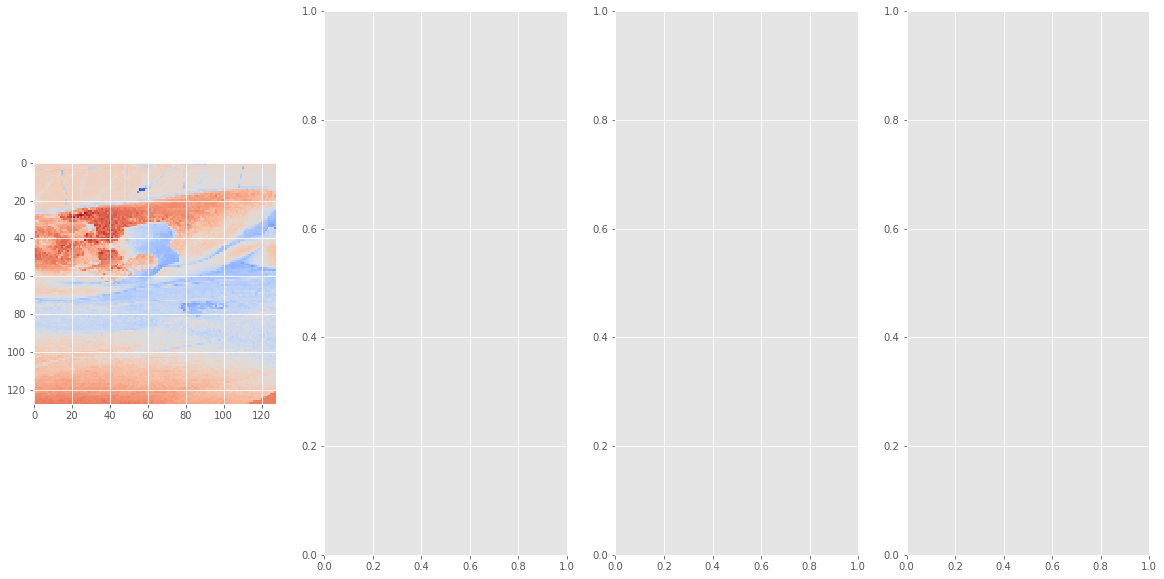

In [265]:
for uu in range(1,8):
    plot_sample(X_valid, y_valid, preds_val, preds_val_t, ix=uu)